In [1]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from numpy import arange

import pandas as pd

In [2]:
# dataset indonesia (jakarta)
case = pd.read_csv('data/new/case_maret_july.csv')
mobility = pd.read_csv('data/new/mobility_maret_july.csv')
weather = pd.read_csv('data/new/weather_maret_july.csv')
case.set_index('date', inplace=True)
#weather.set_index('date', inplace=True)
mobility.set_index('date', inplace=True)

In [3]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

new_weather.set_index('date', inplace=True)

In [4]:
data = pd.concat([case, new_weather, mobility], axis=1)
data.head()

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2020-03-18,38,86.0,27.6,29.0,25.800000,-22,-3,-28,-32,-19,11
2020-03-19,50,83.0,28.1,31.4,25.800000,-28,-12,-33,-38,-21,12
2020-03-20,14,82.0,27.4,31.2,25.200000,-30,-11,-32,-42,-23,15
2020-03-21,44,81.0,28.1,32.4,26.521978,-35,-5,-38,-40,-10,11
2020-03-22,36,84.0,27.2,31.2,25.000000,-49,-22,-59,-49,-12,14


In [5]:
data.shape

(423, 11)

In [6]:
train = data[:413]
test = data[413:]

In [7]:
X = train[['rh', 'avt', 'mxt', 'mnt', 'retail_recreation', 'grocery_pahrmacy', 'parks', 'transit_station', 'workplace', 'residential']]
y = train['case']

In [8]:
case_true = test['case']
del test['case']

In [32]:
# Create the SVR regressor
model = SVR(kernel='sigmoid')

# defiinisikan evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['epsilon'] = arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='neg_root_mean_squared_error')
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -955.693
Config: {'epsilon': 0.0}


In [33]:
# Create the SVR regressor
model = SVR(kernel='sigmoid',epsilon=0.0)
model = model.fit(X,y)
# Generate predictions for testing data
y_pred = model.predict(test)

In [34]:
y_pred

array([884.38642435, 884.25670177, 884.92909407, 884.68043578,
       884.37996718, 884.68185084, 884.45328072, 883.79050343,
       883.47524752, 883.3394359 ])

In [35]:
list_hasil = y_pred.tolist()
list_eval = case_true.tolist()

In [36]:
rmse = mean_squared_error(list_eval, list_hasil, squared=False)
rmse

207.7014876996497

In [37]:
mse = mean_squared_error(list_eval, list_hasil)
mse

43139.90799264774

In [38]:
mae = mean_absolute_error(list_eval, list_hasil)
mae

163.68595380350317

<AxesSubplot:>

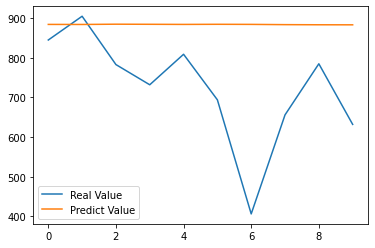

In [39]:
compare = pd.DataFrame(list(zip(list_eval, list_hasil)), columns =['Real Value', 'Predict Value'])
compare.plot()